In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
#Modeling tools
exec(open('tools/modeling.py').read())
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Descriptors import MolLogP
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.Chem import Descriptors
import sys
import multiprocessing
from standardiser import break_bonds, neutralise, rules, unsalt
from standardiser.utils import StandardiseException, sanity_check
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from sklearn.externals import joblib


import sys
def warn(*args, **kwargs):
    pass  # to suppress sklearn warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn = warn
#Modeling tools
exec(open('tools/modeling.py').read())
from rdkit.Chem.Descriptors import MolLogP
from rdkit.Chem import Descriptors
from tools import tools
from tools import  pipeline as p
from tools import  sar
from sklearn.metrics import cohen_kappa_score
import csv
from rdkit.Chem import MACCSkeys
from sklearn.model_selection import ShuffleSplit
import _pickle as cPickle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
import bz2
from glob import glob
import _pickle as cPickle
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split

 # Acute Inhalation

##  Acute Inhalation - Morgan

In [31]:
acute_inhalation = joblib.load('Projeto_4_Acute_oral/model/Modelo_acute_oral_morgan.pkl')
acute_inhalation_data= pd.read_pickle('Projeto_4_Acute_oral/model/Dados_adicionais_acute_oral_morgan.pbz2', compression="bz2")
moldf= acute_inhalation_data['molDF']
del moldf['mol']
moldf.head()

,Outcome,Prediction,Confiability
SMILES,,,
B12B3B4B1C234,0.0,Toxic,82.583333
BrC(Br)(Br)c1ccc2ccccc2n1,0.0,Toxic,62.666667
BrC(Br)Br,1.0,Toxic,89.333333
BrC(Br)C(Br)Br,1.0,Toxic,88.333333
BrC1(Br)C2CCC1CC2,1.0,Non-Toxic,60.333333


In [32]:
#
moldf['Outcome']=np.where(moldf['Outcome'] >= 1, 1, -1)
moldf['Prediction']=np.where(moldf['Prediction']== 'Toxic', 1, -1)
moldf['Confiability']= moldf['Confiability'].values/100
#
moldf_acute_inhalation = moldf.copy()
#del moldf_acute_inhalation['Outcome']
moldf_acute_inhalation = moldf_acute_inhalation.rename(columns={"Prediction": "Morgan_Pred", "Confiability": "Morgan_Conf"})
fps_acute_inhalation_morgan= np.vstack(acute_inhalation_data['fpDF']['FingerPrint'].values)
X, y = train_test_split( fps_acute_inhalation_morgan , test_size=0.2, random_state=42)
acute_inhalation_morgan_AD_limit= (np.average(acute_inhalation_data['applM'])-(1*(np.std(acute_inhalation_data['applM']))))
acute_inhalation_morgan_K= acute_inhalation_data["k"]
acute_inhalation_morgan_AD = getNeighborsDitance(X,fps_acute_inhalation_morgan , acute_inhalation_morgan_K)
moldf_acute_inhalation['Morgan AD']= np.where(acute_inhalation_morgan_AD >=acute_inhalation_morgan_AD_limit, 1, 0)
moldf_acute_inhalation.head()

,Outcome,Morgan_Pred,Morgan_Conf,Morgan AD
SMILES,,,,
B12B3B4B1C234,-1,1,0.825833,1
BrC(Br)(Br)c1ccc2ccccc2n1,-1,1,0.626667,1
BrC(Br)Br,1,1,0.893333,1
BrC(Br)C(Br)Br,1,1,0.883333,1
BrC1(Br)C2CCC1CC2,1,-1,0.603333,1


In [33]:
moldf_acute_inhalation['Morgan Pred'] = moldf_acute_inhalation[['Morgan_Pred', 'Morgan_Conf']].prod(1)
moldf_acute_inhalation['Morgan Pred AD'] = moldf_acute_inhalation[['Morgan_Pred', 'Morgan_Conf','Morgan AD']].prod(1)
moldf_acute_inhalation.head()
moldf_acute_inhalation_morgan= moldf_acute_inhalation[['Outcome','Morgan Pred', 'Morgan Pred AD']]
moldf_acute_inhalation_morgan.head()

,Outcome,Morgan Pred,Morgan Pred AD
SMILES,,,
B12B3B4B1C234,-1,0.825833,0.825833
BrC(Br)(Br)c1ccc2ccccc2n1,-1,0.626667,0.626667
BrC(Br)Br,1,0.893333,0.893333
BrC(Br)C(Br)Br,1,0.883333,0.883333
BrC1(Br)C2CCC1CC2,1,-0.603333,-0.603333


##  Acute Inhalation - MACCS

In [34]:
acute_inhalation_maccs = joblib.load('Projeto_4_Acute_oral/model/Modelo_acute_oral_maccs.pkl')
acute_inhalation_data_maccs= pd.read_pickle('Projeto_4_Acute_oral/model/Dados_adicionais_acute_oral_MACCS.pbz2', compression="bz2")
moldf= acute_inhalation_data_maccs['molDF']
del moldf['mol']
moldf.head()

,Outcome,Prediction,Confiability
SMILES,,,
B12B3B4B1C234,0.0,Toxic,72.413333
BrC(Br)(Br)c1ccc2ccccc2n1,0.0,Toxic,73.183333
BrC(Br)Br,1.0,Toxic,84.400000
BrC(Br)C(Br)Br,1.0,Toxic,90.000000
BrC1(Br)C2CCC1CC2,1.0,Non-Toxic,70.640000


In [35]:
#
moldf['Outcome']=np.where(moldf['Outcome'] >= 1, 1, -1)
moldf['Prediction']=np.where(moldf['Prediction']== 'Toxic', 1, -1)
moldf['Confiability']= moldf['Confiability'].values/100
#
moldf_acute_inhalation_maccs = moldf.copy()
#del moldf_acute_inhalation['Outcome']
moldf_acute_inhalation_maccs= moldf_acute_inhalation_maccs.rename(columns={"Prediction": "MACCS_Pred", "Confiability": "MACCS_Conf"})
fps_acute_inhalation_maccs= np.vstack(acute_inhalation_data_maccs['fpDF']['FingerPrint'].values)
X, y = train_test_split( fps_acute_inhalation_maccs , test_size=0.2, random_state=42)
acute_inhalation_maccs_AD_limit= (np.average(acute_inhalation_data_maccs['applM'])-(1*(np.std(acute_inhalation_data_maccs['applM']))))
acute_inhalation_maccs_K= acute_inhalation_data_maccs["k"]
acute_inhalation_maccs_AD = getNeighborsDitance(X,fps_acute_inhalation_maccs , acute_inhalation_maccs_K)
moldf_acute_inhalation_maccs['MACCS AD']= np.where(acute_inhalation_maccs_AD >=acute_inhalation_maccs_AD_limit, 1, 0)
moldf_acute_inhalation_maccs.head(100)

,Outcome,MACCS_Pred,MACCS_Conf,MACCS AD
SMILES,,,,
B12B3B4B1C234,-1,1,0.724133,1
BrC(Br)(Br)c1ccc2ccccc2n1,-1,1,0.731833,1
BrC(Br)Br,1,1,0.844000,1
BrC(Br)C(Br)Br,1,1,0.900000,1
BrC1(Br)C2CCC1CC2,1,-1,0.706400,0
BrC12CC3CC(CC(C3)C1)C2,-1,-1,0.503333,0
BrC1CC(Br)CC(Br)CC(Br)CC(Br)CC(Br)C1,-1,1,0.526000,0
BrC1CCC(Br)C(Br)CCC(Br)C(Br)CCC1Br,-1,-1,0.716000,1
BrC=CBr,1,1,0.952000,1


In [36]:
moldf_acute_inhalation_maccs['MACCS Pred'] = moldf_acute_inhalation_maccs[['MACCS_Pred', 'MACCS_Conf']].prod(1)
moldf_acute_inhalation_maccs['MACCS Pred AD'] = moldf_acute_inhalation_maccs[['MACCS_Pred', 'MACCS_Conf','MACCS AD']].prod(1)
moldf_acute_inhalation_maccs.head()
moldf_acute_inhalation_maccs= moldf_acute_inhalation_maccs[['Outcome','MACCS Pred', 'MACCS Pred AD']]
del moldf_acute_inhalation_maccs['Outcome']
moldf_acute_inhalation_maccs.head(200)

,MACCS Pred,MACCS Pred AD
SMILES,,
B12B3B4B1C234,0.724133,0.724133
BrC(Br)(Br)c1ccc2ccccc2n1,0.731833,0.731833
BrC(Br)Br,0.844000,0.844000
BrC(Br)C(Br)Br,0.900000,0.900000
BrC1(Br)C2CCC1CC2,-0.706400,-0.000000
BrC12CC3CC(CC(C3)C1)C2,-0.503333,-0.000000
BrC1CC(Br)CC(Br)CC(Br)CC(Br)CC(Br)C1,0.526000,0.000000
BrC1CCC(Br)C(Br)CCC(Br)C(Br)CCC1Br,-0.716000,-0.716000
BrC=CBr,0.952000,0.952000


##  Acute Inhalation - mordred


In [37]:
acute_inhalation_modred = joblib.load('Projeto_4_Acute_oral/model/Modelo_acute_oral_mordred.pkl')
acute_inhalation_data_mordred= pd.read_pickle('Projeto_4_Acute_oral/model/Dados_adicionais_acute_oral_mordred.pbz2', compression="bz2")
moldf= acute_inhalation_data_mordred['molDF']
del moldf['mol']
moldf.head()

,Outcome,Prediction,Confiability
SMILES,,,
B12B3B4B1C234,0,Toxic,52.666667
BrC(Br)(Br)c1ccc2ccccc2n1,0,Non-Toxic,50.666667
BrC(Br)Br,1,Toxic,88.333333
BrC(Br)C(Br)Br,1,Toxic,75.000000
BrC1(Br)C2CCC1CC2,1,Non-Toxic,56.000000


In [39]:
#
moldf['Outcome']=np.where(moldf['Outcome'] >= '1', 1, -1)
moldf['Prediction']=np.where(moldf['Prediction']== 'Toxic', 1, -1)
moldf['Confiability']= moldf['Confiability'].values/100
#
moldf_acute_inhalation_mordred = moldf.copy()
#del moldf_acute_inhalation['Outcome']
moldf_acute_inhalation_mordred= moldf_acute_inhalation_mordred.rename(columns={"Prediction": "Mordred_Pred", "Confiability": "Mordred_Conf"})
fps_acute_inhalation_mordred= np.vstack(acute_inhalation_data_mordred['fpDF']['FingerPrint'].values)
X, y = train_test_split( fps_acute_inhalation_mordred , test_size=0.2, random_state=42)
acute_inhalation_mordred_AD_limit= (np.average(acute_inhalation_data_mordred['applM'])-(1*(np.std(acute_inhalation_data_mordred['applM']))))
acute_inhalation_mordred_K= acute_inhalation_data_mordred["k"]
acute_inhalation_mordred_AD = getNeighborsDitance(X,fps_acute_inhalation_mordred , acute_inhalation_mordred_K)
moldf_acute_inhalation_mordred['Mordred AD']= np.where(acute_inhalation_mordred_AD >=acute_inhalation_mordred_AD_limit, 1, 0)
moldf_acute_inhalation_mordred.head(100)

,Outcome,Mordred_Pred,Mordred_Conf,Mordred AD
SMILES,,,,
B12B3B4B1C234,-1,1,0.526667,1
BrC(Br)(Br)c1ccc2ccccc2n1,-1,-1,0.506667,1
BrC(Br)Br,1,1,0.883333,1
BrC(Br)C(Br)Br,1,1,0.750000,1
BrC1(Br)C2CCC1CC2,1,-1,0.560000,0
BrC12CC3CC(CC(C3)C1)C2,-1,1,0.520000,1
BrC1CC(Br)CC(Br)CC(Br)CC(Br)CC(Br)C1,-1,-1,0.750000,1
BrC1CCC(Br)C(Br)CCC(Br)C(Br)CCC1Br,-1,-1,0.786667,1
BrC=CBr,1,1,0.916667,1


In [40]:
moldf_acute_inhalation_mordred['Mordred Pred'] = moldf_acute_inhalation_mordred[['Mordred_Pred', 'Mordred_Conf']].prod(1)
moldf_acute_inhalation_mordred['Mordred Pred AD'] = moldf_acute_inhalation_mordred[['Mordred_Pred', 'Mordred_Conf','Mordred AD']].prod(1)
moldf_acute_inhalation_mordred.head()
moldf_acute_inhalation_mordred= moldf_acute_inhalation_mordred[['Outcome','Mordred Pred', 'Mordred Pred AD']]
del moldf_acute_inhalation_mordred['Outcome']
moldf_acute_inhalation_mordred.head(200)

,Mordred Pred,Mordred Pred AD
SMILES,,
B12B3B4B1C234,0.526667,0.526667
BrC(Br)(Br)c1ccc2ccccc2n1,-0.506667,-0.506667
BrC(Br)Br,0.883333,0.883333
BrC(Br)C(Br)Br,0.750000,0.750000
BrC1(Br)C2CCC1CC2,-0.560000,-0.000000
BrC12CC3CC(CC(C3)C1)C2,0.520000,0.520000
BrC1CC(Br)CC(Br)CC(Br)CC(Br)CC(Br)C1,-0.750000,-0.750000
BrC1CCC(Br)C(Br)CCC(Br)C(Br)CCC1Br,-0.786667,-0.786667
BrC=CBr,0.916667,0.916667


In [41]:
moldf_global=pd.concat([moldf_acute_inhalation_morgan, moldf_acute_inhalation_maccs, 
                       moldf_acute_inhalation_mordred ], axis=1, 
                      join_axes=[moldf_acute_inhalation_morgan.index])
moldf_global.head()

,Outcome,Morgan Pred,Morgan Pred AD,MACCS Pred,MACCS Pred AD,Mordred Pred,Mordred Pred AD
SMILES,,,,,,,
B12B3B4B1C234,-1,0.825833,0.825833,0.724133,0.724133,0.526667,0.526667
BrC(Br)(Br)c1ccc2ccccc2n1,-1,0.626667,0.626667,0.731833,0.731833,-0.506667,-0.506667
BrC(Br)Br,1,0.893333,0.893333,0.844000,0.844000,0.883333,0.883333
BrC(Br)C(Br)Br,1,0.883333,0.883333,0.900000,0.900000,0.750000,0.750000
BrC1(Br)C2CCC1CC2,1,-0.603333,-0.603333,-0.706400,-0.000000,-0.560000,-0.000000


In [42]:
moldf_global['Consensus Conf'] = moldf_global[['Morgan Pred','MACCS Pred','Mordred Pred']].mean(1)
moldf_global['Consensus']=np.where(moldf_global['Consensus Conf']>= 0, 1, -1)
moldf_global['Consensus Conf AD'] = moldf_global[['Morgan Pred AD','MACCS Pred AD','Mordred Pred AD']].mean(1)
moldf_global['Consensus AD']=np.where(moldf_global['Consensus Conf AD']>= 0, 1, -1)

In [43]:
moldf_global

,Outcome,Morgan Pred,Morgan Pred AD,MACCS Pred,MACCS Pred AD,Mordred Pred,Mordred Pred AD,Consensus Conf,Consensus,Consensus Conf AD,Consensus AD
SMILES,,,,,,,,,,,
B12B3B4B1C234,-1,0.825833,0.825833,0.724133,0.724133,0.526667,0.526667,0.692211,1,0.692211,1
BrC(Br)(Br)c1ccc2ccccc2n1,-1,0.626667,0.626667,0.731833,0.731833,-0.506667,-0.506667,0.283944,1,0.283944,1
BrC(Br)Br,1,0.893333,0.893333,0.844000,0.844000,0.883333,0.883333,0.873556,1,0.873556,1
BrC(Br)C(Br)Br,1,0.883333,0.883333,0.900000,0.900000,0.750000,0.750000,0.844444,1,0.844444,1
BrC1(Br)C2CCC1CC2,1,-0.603333,-0.603333,-0.706400,-0.000000,-0.560000,-0.000000,-0.623244,-1,-0.201111,-1
BrC12CC3CC(CC(C3)C1)C2,-1,-0.636667,-0.000000,-0.503333,-0.000000,0.520000,0.520000,-0.206667,-1,0.173333,1
BrC1CC(Br)CC(Br)CC(Br)CC(Br)CC(Br)C1,-1,0.610000,0.000000,0.526000,0.000000,-0.750000,-0.750000,0.128667,1,-0.250000,-1
BrC1CCC(Br)C(Br)CCC(Br)C(Br)CCC1Br,-1,0.546667,0.546667,-0.716000,-0.716000,-0.786667,-0.786667,-0.318667,-1,-0.318667,-1
BrC=CBr,1,0.936667,0.936667,0.952000,0.952000,0.916667,0.916667,0.935111,1,0.935111,1


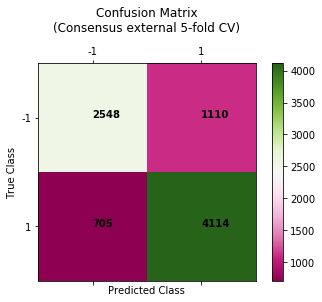

########################################
#   Unbalanced Statistical Parameters  #
########################################
Accuracy: 0.79
Area under the Curve (AUC): 0.78
########################################
#   Balanced Statistical Parameters    #
########################################
Correct Classification Rate (CCR): 0.77
Weighted Kappa:  0.56
########################################
#            Positive Class            #
########################################
Sensitivity (Se): 0.85
Positive Predictive Value (PPV): 0.79
########################################
#            Negative Class            #
########################################
Specificity (Sp): 0.7
Negative Predictive Value (NPV): 0.78
########################################
#     Other Statistical Parameters     #
########################################
Precision:  0.79
Recall:  0.85
F1:  0.82
########################################
#        Applicability Domain          #
###############################

In [44]:
run_statistics(moldf_global['Outcome'], moldf_global['Consensus'], label="Consensus external 5-fold CV", coverage=100)

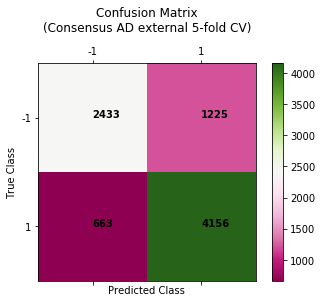

########################################
#   Unbalanced Statistical Parameters  #
########################################
Accuracy: 0.78
Area under the Curve (AUC): 0.76
########################################
#   Balanced Statistical Parameters    #
########################################
Correct Classification Rate (CCR): 0.76
Weighted Kappa:  0.54
########################################
#            Positive Class            #
########################################
Sensitivity (Se): 0.86
Positive Predictive Value (PPV): 0.77
########################################
#            Negative Class            #
########################################
Specificity (Sp): 0.67
Negative Predictive Value (NPV): 0.79
########################################
#     Other Statistical Parameters     #
########################################
Precision:  0.77
Recall:  0.86
F1:  0.81
########################################
#        Applicability Domain          #
##############################

In [45]:
coverage= (len(moldf_global['Consensus AD'])*100/len(moldf))
run_statistics(moldf_global['Outcome'], moldf_global['Consensus AD'], 
               label="Consensus AD external 5-fold CV", coverage=int(coverage))